Dataset used in this notebook can be downloaded from: https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

# PySpark installation

## Inspecting first 5 rows of data

In [1]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/13 18:43:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('Exercise Files/datasets/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)  # nicely formatted

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [3]:
# How to fetch rows?
rc.take(5)  # this function calls collect() on the limit() function

[Row(ID='5741943', Case Number='HN549294', Date=datetime.datetime(2007, 8, 25, 9, 22, 18), Block='074XX N ROGERS AVE', IUCR='0560', Primary Type='ASSAULT', Description='SIMPLE', Location Description='OTHER', Arrest='false', Domestic='false', Beat='2422', District='024', Ward='49', Community Area='1', FBI Code='08A', X Coordinate=None, Y Coordinate=None, Year='2007', Updated On='08/17/2015 03:03:40 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID='1930689', Case Number='HH109118', Date=datetime.datetime(2002, 1, 5, 21, 24), Block='007XX E 103 ST', IUCR='0820', Primary Type='THEFT', Description='$500 AND UNDER', Location Description='GAS STATION', Arrest='true', Domestic='false', Beat='0512', District='005', Ward=None, Community Area=None, FBI Code='06', X Coordinate=None, Y Coordinate=None, Year='2002', Updated On='02/04/2016 06:33:39 AM', Latitude=None, Longitude=None, Location=None),
 Row(ID='12416974', Case Number='JE293464', Date=datetime.datetime(2011, 8, 10, 0, 1), Bloc

In [4]:
rc.limit(5)  # this returns a new DataFrame

DataFrame[ID: string, Case Number: string, Date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [5]:
rc.head(5)  # this returns rows just like take(); actually this function calls the take() function

[Row(ID='5741943', Case Number='HN549294', Date=datetime.datetime(2007, 8, 25, 9, 22, 18), Block='074XX N ROGERS AVE', IUCR='0560', Primary Type='ASSAULT', Description='SIMPLE', Location Description='OTHER', Arrest='false', Domestic='false', Beat='2422', District='024', Ward='49', Community Area='1', FBI Code='08A', X Coordinate=None, Y Coordinate=None, Year='2007', Updated On='08/17/2015 03:03:40 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID='1930689', Case Number='HH109118', Date=datetime.datetime(2002, 1, 5, 21, 24), Block='007XX E 103 ST', IUCR='0820', Primary Type='THEFT', Description='$500 AND UNDER', Location Description='GAS STATION', Arrest='true', Domestic='false', Beat='0512', District='005', Ward=None, Community Area=None, FBI Code='06', X Coordinate=None, Y Coordinate=None, Year='2002', Updated On='02/04/2016 06:33:39 AM', Latitude=None, Longitude=None, Location=None),
 Row(ID='12416974', Case Number='JE293464', Date=datetime.datetime(2011, 8, 10, 0, 1), Bloc

## Schemas

In [6]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [7]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [8]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [9]:
labels = [
    ('ID', StringType()),
    ('Case Number', StringType()),
    ('Date', TimestampType()),
    ('Block', StringType()),
    ('IUCR', StringType()),
    ('Primary Type', StringType()),
    ('Description', StringType()),
    ('Location Description', StringType()),
    ('Arrest', StringType()),
    ('Domestic', BooleanType()),
    ('Beat', StringType()),
    ('District', StringType()),
    ('Ward', StringType()),
    ('Community Area', StringType()),
    ('FBI Code', StringType()),
    ('X Coordinate', StringType()),
    ('Y Coordinate', StringType()),
    ('Year', IntegerType()),
    ('Updated On', StringType()),
    ('Latitude', DoubleType()),
    ('Longitude', DoubleType()),
    ('Location', StringType()),
]

In [10]:
schema = StructType([StructField (x[0], x[1], True) for x in labels])

In [11]:
schema.fields

[StructField('ID', StringType(), True),
 StructField('Case Number', StringType(), True),
 StructField('Date', TimestampType(), True),
 StructField('Block', StringType(), True),
 StructField('IUCR', StringType(), True),
 StructField('Primary Type', StringType(), True),
 StructField('Description', StringType(), True),
 StructField('Location Description', StringType(), True),
 StructField('Arrest', StringType(), True),
 StructField('Domestic', BooleanType(), True),
 StructField('Beat', StringType(), True),
 StructField('District', StringType(), True),
 StructField('Ward', StringType(), True),
 StructField('Community Area', StringType(), True),
 StructField('FBI Code', StringType(), True),
 StructField('X Coordinate', StringType(), True),
 StructField('Y Coordinate', StringType(), True),
 StructField('Year', IntegerType(), True),
 StructField('Updated On', StringType(), True),
 StructField('Latitude', DoubleType(), True),
 StructField('Longitude', DoubleType(), True),
 StructField('Locatio

In [12]:
rc2 = spark.read.csv('Exercise Files/datasets/reported-crimes.csv', schema=schema)

In [13]:
rc2.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [14]:
rc2.show(5)

+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|NULL|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|    NULL|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|NULL|  

In [15]:
rc.select('ID', 'IUCR').show(3)

+--------+----+
|      ID|IUCR|
+--------+----+
| 5741943|0560|
| 1930689|0820|
|12416974|1753|
+--------+----+
only showing top 3 rows



In [16]:
rc.withColumnRenamed('ID', 'IDD')

DataFrame[IDD: string, Case Number: string, Date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [17]:
rc.select(col('IUCR')).show(4)

+----+
|IUCR|
+----+
|0560|
|0820|
|1753|
|1753|
+----+
only showing top 4 rows



In [18]:
rc.select('Case Number').show(1)

+-----------+
|Case Number|
+-----------+
|   HN549294|
+-----------+
only showing top 1 row



In [19]:
from pyspark.sql.functions import lit  # literal

In [20]:
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|One|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|  

In [21]:
rc2 = rc.drop('IUCR')
rc2.show(5)

+--------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|        NULL|        NULL

In [22]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(20) 

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1418529|
|             BATTERY|1232292|
|     CRIMINAL DAMAGE| 771523|
|           NARCOTICS| 711775|
|       OTHER OFFENSE| 419045|
|             ASSAULT| 418522|
|            BURGLARY| 388042|
| MOTOR VEHICLE THEFT| 314136|
|  DECEPTIVE PRACTICE| 267247|
|             ROBBERY| 255603|
|   CRIMINAL TRESPASS| 193372|
|   WEAPONS VIOLATION|  70667|
|        PROSTITUTION|  68327|
|PUBLIC PEACE VIOL...|  47785|
|OFFENSE INVOLVING...|  46855|
| CRIM SEXUAL ASSAULT|  26396|
|         SEX OFFENSE|  25658|
|INTERFERENCE WITH...|  15141|
|            GAMBLING|  14422|
|LIQUOR LAW VIOLATION|  14068|
+--------------------+-------+
only showing top 20 rows



In [23]:
rc.groupBy('Arrest').count().show()

Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=31680Kb max_used=31696Kb free=99391Kb
 bounds [0x000000010c1d8000, 0x000000010e118000, 0x00000001141d8000]
 total_blobs=11730 nmethods=10782 adapters=860
 compilation: disabled (not enough contiguous free space left)


+------+-------+
|Arrest|  count|
+------+-------+
| false|4881559|
|  true|1875289|
+------+-------+



In [24]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [25]:
rc.filter(col('Arrest') == 'true').count() / rc.select('Arrest').count()

0.2775390241130184

In [26]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770638|
|           RESIDENCE|1146324|
|           APARTMENT| 699255|
+--------------------+-------+
only showing top 3 rows



We need to import functions that are out of basic scope.

In [27]:
from pyspark.sql.functions import lower, upper, substring

In [28]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [29]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring('Primary Type', 1, 4)).show(5)

+--------------------+--------------------+-----------------------------+
| lower(Primary Type)| upper(Primary Type)|substring(Primary Type, 1, 4)|
+--------------------+--------------------+-----------------------------+
|             assault|             ASSAULT|                         ASSA|
|               theft|               THEFT|                         THEF|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
+--------------------+--------------------+-----------------------------+
only showing top 5 rows



In [30]:
from pyspark.sql.functions import min, max

In [31]:
rc.select(min(col('Date')), max(col('Date'))).show(5)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



In [32]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [33]:
rc.select(to_date(lit('2019-01-01')), to_date(lit('2019-25-15'))).show(1)

+-------------------+-------------------+
|to_date(2019-01-01)|to_date(2019-25-15)|
+-------------------+-------------------+
|         2019-01-01|               NULL|
+-------------------+-------------------+
only showing top 1 row



In [34]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [35]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



In [36]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
df.show(1, truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [37]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a')).show(1)

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



>!wget -O Excercise\ Files/police_station.csv 'https://data.cityofchicago.org/Public-Safety/Police-Stations/z8bn-74gv/about_data'

In [38]:
ps = spark.read.csv('Exercise Files/datasets/police_stations.csv', header=True)

In [39]:
ps.show(5, truncate=False)

+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|DISTRICT    |DISTRICT NAME|ADDRESS            |CITY   |STATE|ZIP  |WEBSITE                                                                     |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |
+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|Headquarters|Headquarters |3510 S Michigan Ave|Chicago|IL   |60653|http://home.chicagopolice.org                                               |NULL        |NULL        |NULL        |1177731.401 

In [40]:
ps = ps.select(f.lpad(col('DISTRICT'), len=3, pad='0'))

In [41]:
ps.show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 014|
+--------------------+
only showing top 20 rows



###     Task
1. Find the most frequently reported noncriminal activity.
2. Find the day of the week with the most reported crimes.

In [42]:
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

In [43]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(5)

+---------------+-------+
|   Primary Type|  count|
+---------------+-------+
|          THEFT|1418529|
|        BATTERY|1232292|
|CRIMINAL DAMAGE| 771523|
|      NARCOTICS| 711775|
|  OTHER OFFENSE| 419045|
+---------------+-------+
only showing top 5 rows



In [44]:
rc.select(col('Primary Type')).distinct().show(5, truncate=False)

+--------------------------+
|Primary Type              |
+--------------------------+
|OFFENSE INVOLVING CHILDREN|
|CRIMINAL SEXUAL ASSAULT   |
|STALKING                  |
|PUBLIC PEACE VIOLATION    |
|OBSCENITY                 |
+--------------------------+
only showing top 5 rows



In [45]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))

In [46]:
nc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [47]:
nc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(truncate=False)

+--------------------------------+-----+
|Primary Type                    |count|
+--------------------------------+-----+
|NON-CRIMINAL                    |163  |
|NON - CRIMINAL                  |38   |
|NON-CRIMINAL (SUBJECT SPECIFIED)|9    |
+--------------------------------+-----+



In [48]:
# Answer for the first question:
nc.groupby('Description').count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [49]:
rc.select(col('Date'), f.dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2007-08-25 09:22:18|              7|
|2002-01-05 21:24:00|              7|
|2011-08-10 00:01:00|              4|
|2015-09-24 00:00:00|              5|
|2014-09-07 00:00:00|              1|
+-------------------+---------------+
only showing top 5 rows



In [50]:
rc.select(col('Date'), f.dayofweek(col('Date')), f.date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2007-08-25 09:22:18|              7|                 Sat|
|2002-01-05 21:24:00|              7|                 Sat|
|2011-08-10 00:01:00|              4|                 Wed|
|2015-09-24 00:00:00|              5|                 Thu|
|2014-09-07 00:00:00|              1|                 Sun|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [51]:
rc.groupBy(f.date_format(col('Date'), 'E')).count().orderBy('count', ascending=False).show(7)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017481|
|                 Wed| 974389|
|                 Tue| 968550|
|                 Sat| 965601|
|                 Thu| 965120|
|                 Mon| 953252|
|                 Sun| 912455|
+--------------------+-------+



In [52]:
dow = [x[0] for x in rc.groupBy(f.date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [53]:
cnt = [x[1] for x in rc.groupBy(f.date_format(col('Date'), 'E')).count().collect()]
cnt

[912455, 953252, 965120, 965601, 974389, 1017481, 968550]

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
cp = pd.DataFrame({'Count': cnt, 'Day_of_week': dow})

Text(0.5, 1.0, 'Friday notes highest crime rate')

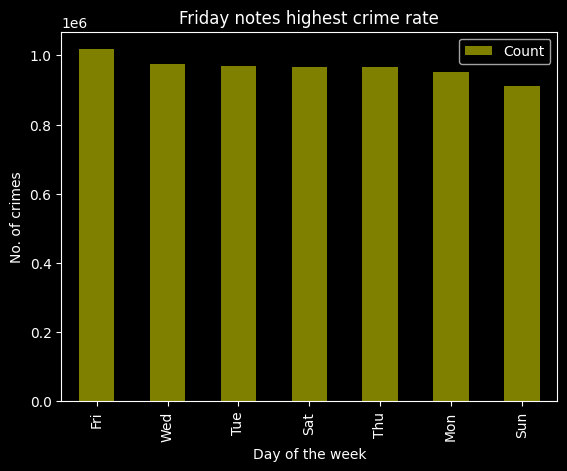

In [56]:
cp.sort_values('Count', ascending=False).plot(kind='bar', color='olive', x='Day_of_week', y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of crimes')
plt.title('Friday notes highest crime rate')